In [1]:
cd ..

/Users/daniellebarnes/development/ceREEBerus


In [2]:
! pip install .

Processing /Users/daniellebarnes/development/ceREEBerus
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cereeberus: filename=cereeberus-0.0.5-py3-none-any.whl size=18192 sha256=4740b0c894abb7f4eea1de3e47b1c661499dd126f156409ce7d189ef8392b5f2
  Stored in directory: /private/var/folders/p6/pn26dbmx4jj67d6nh7m6557h0000gn/T/pip-ephem-wheel-cache-xi64axhq/wheels/ba/0b/08/8340df22f780a7a3281c7f7e134235d0cced784225c7bf2d6f
Successfully built cereeberus
  Attempting uninstall: cereeberus
    Found existing installation: cereeberus 0.0.5
    Uninstalling cereeberus-0.0.5:
      Successfully uninstalled cereeberus-0.0.5
You should consider upgrading via the '/Users/daniellebarnes/development/ceREEBerus/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import cereeberus.data.graphs as graphs
from cereeberus.reeb import Reeb

# Examples of Reeb graphs

In the following notebook, we show examples of Reeb graphs that are included in the package which show functionality related to the main class. All Reeb graphs are stored as the class `cereberus.reeb.Reeb`.

In [4]:
reeb_torus = graphs.reeb_torus()
reeb_torus

The Reeb Graph class has many attributes available such as nodes, edges, position, up degree, down degree, and function values provided at class instantiation

In [5]:
print("Reeb Graph nodes: ", reeb_torus.nodes)
print("Reeb Graph edges: ", reeb_torus.edges)
print("Reeb Graph function values: ", reeb_torus.fx)
print("Reeb Graph up degree: ", reeb_torus.up_deg)
print("Reeb Graph down degree: ", reeb_torus.down_deg)
#print("Reeb Graph Adjacency Matrix:", reeb_torus.adjacency)
print("Reeb Graph Plotting Positions:", reeb_torus.pos_fx)
print("Drawing Preference:", reeb_torus._horizontalDrawing)
reeb_torus.summary

Reeb Graph nodes:  [0, 1, 2, 3, 4, 5]
Reeb Graph edges:  [(0, 1, 0), (1, 2, 0), (1, 3, 0), (2, 4, 0), (3, 4, 0), (4, 5, 0)]
Reeb Graph function values:  {0: 1, 1: 2, 2: 3, 3: 3, 4: 4, 5: 5}
Reeb Graph up degree:  {0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 0}
Reeb Graph down degree:  {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 1}
Reeb Graph Plotting Positions: {0: (1, 1), 1: (1, 2), 2: (0.5, 3), 3: (1.5, 3), 4: (1, 4), 5: (1, 5)}
Drawing Preference: False


{'nodes': 6, 'edges': 6}

There is also a custom plot function to plot Reeb Graphs which can be called with `plot_reeb`.

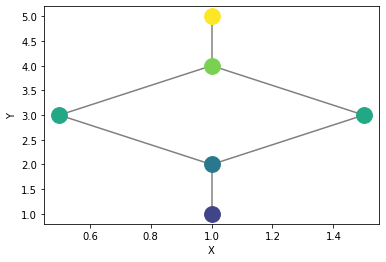

In [6]:
Reeb.plot_reeb(reeb_torus)

By using the `horizontalDrawing` parameter, you can plot the Reeb Graph horizontally instead of vertically

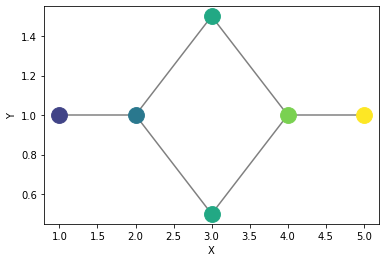

In [7]:
Reeb.plot_reeb(reeb_torus, horizontalDrawing=True)

You can also pass your own positions in, in which case we note the `horizontalDrawing` and `verbose` parameters are not used.

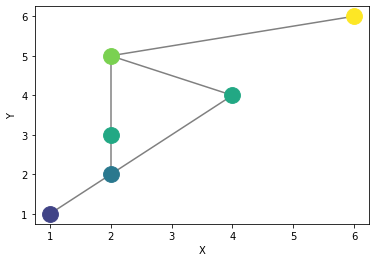

In [8]:
Reeb.plot_reeb(reeb_torus, position = {0:(1,1), 1:(2,2), 2:(2,3), 3:(4,4), 4:(2,5), 5:(6,6)}, horizontalDrawing = False, verbose = False)

You can also reset the positions completely by using the `resetSpring` parameter

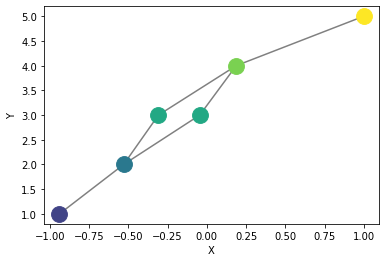

In [24]:
Reeb.plot_reeb(reeb_torus, resetSpring = True)

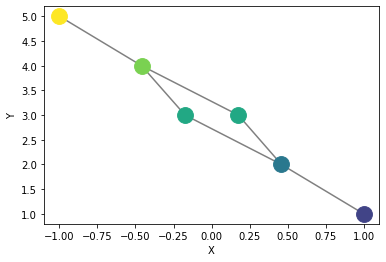

In [10]:
Reeb.plot_reeb(reeb_torus, resetSpring = True)

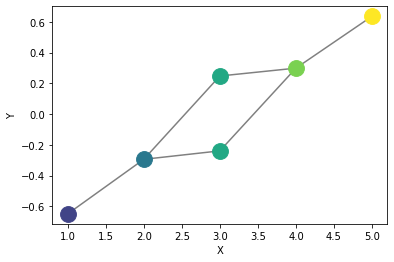

In [11]:
Reeb.plot_reeb(reeb_torus, resetSpring = True, horizontalDrawing=True)

There are also some other graphs, such as the dancing man

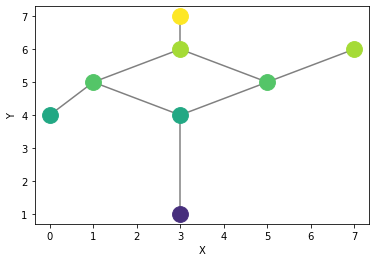

In [12]:
dm = graphs.reeb_dancing_man()
Reeb.plot_reeb(dm)

The next is an illustration of how loops are handled in the `plot_reeb()` function.  The 'cp' parameter controls how loopy the loops are.

In [13]:
sl = graphs.reeb_simple_loops()

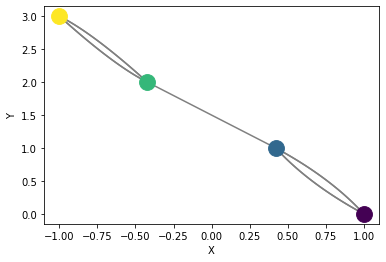

In [14]:
Reeb.plot_reeb(sl, cpx=.1)

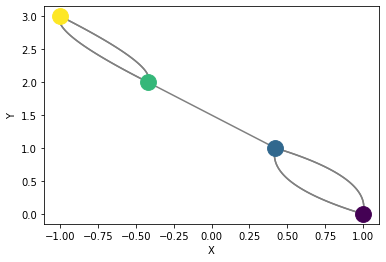

In [15]:
Reeb.plot_reeb(sl, cpx=.5)

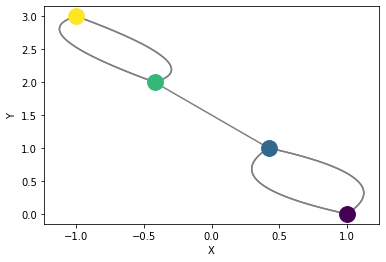

In [16]:
Reeb.plot_reeb(sl, cpx=1)

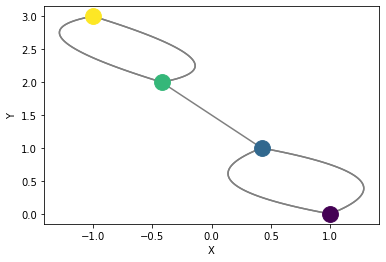

In [17]:
Reeb.plot_reeb(sl, cpx=1.5)

We can add nodes at a certain function values.  To demonstrate this we will use the `reeb_torus` graph.

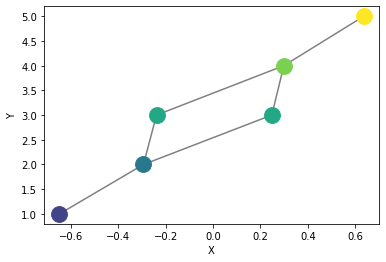

In [18]:
Reeb.plot_reeb(reeb_torus)

Let's add a node at value 4.5

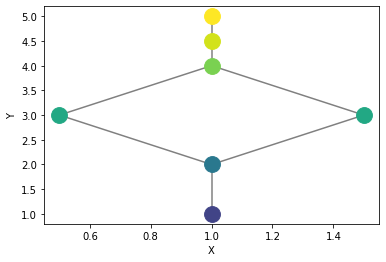

In [19]:
from cereeberus.compute import degree
import networkx as nx
reeb_torus = graphs.reeb_torus()
test = degree.add_nodes(reeb_torus, fx=4.5, x = 1)
Reeb.plot_reeb(test)

Let's add additional nodes at 3.5

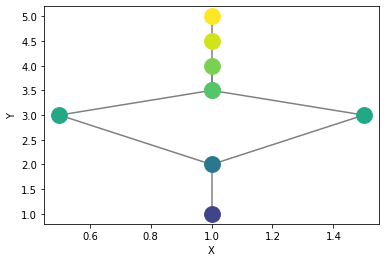

In [20]:
test = degree.add_nodes(test, fx=3.5, x=1)
Reeb.plot_reeb(test)

And one more at 1.25

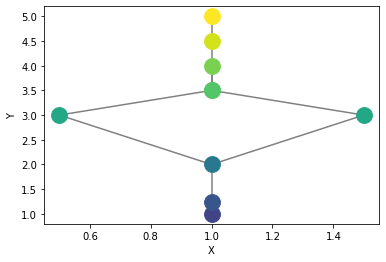

In [21]:
test = degree.add_nodes(test, fx=1.25, x=1)
Reeb.plot_reeb(test)

We can also remove any unnecessary nodes using the `minimal_reeb` function

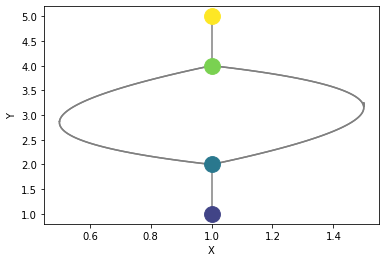

In [22]:
from cereeberus.compute import degree
t = degree.minimal_reeb(test)
Reeb.plot_reeb(t, cpx=1)

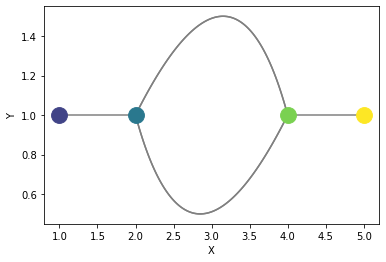

In [23]:
Reeb.plot_reeb(t, horizontalDrawing = True, cpy=1)